## Imports

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alexandria\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Alexandria\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alexandria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Import Reflection Data to Dataframe

In [2]:
df = pd.read_csv("3155 Spr'21 Reflection Data - Week 2.csv")

#Anonymize
df['name'] = '*****'

df.head(5)

,name,"Q1: Did you watch all of this week's videos (Sommerville, Scrum, etc)?",Q2: Did you read through the chapters provided (1. Software Products and 2. Agile SE),Q3: Did you feel prepared for this week's class activities?,Q4: What was the most important thing you learned this week and why?,"Q5: What was your biggest challenge this past week? This can include in-class activities, assignments, prep work, studying, time management, motivation, and so on.",Q6: How can you address the challenge you mentioned above? What can you do to overcome this challenge for next time?,"Q7: Reflect on the following and answer in as much detail as possible:i) Before taking this course, what did you think software engineering was? Describe in your own words. ii) Up until this point of the semester, think about what you have learned so far. What do you think the importance of software engineering is in the computer science field? How do you think it will help you in the future?","Q8: On a scale of 1 to 5, with 5 being Very Active and 1 being Not Active, how engaged would you rate your Campuswire group so far?",note
0,*****,Yes,Yes,Yes,"I learned about requirements engineering, I fe...",Forgetting to turn in the requirements analysi...,Double checking whether I have submitted the a...,Before this course I thought software engineer...,4,NaN
1,*****,Yes,Yes,Yes,"Agile development and Scrum, they seem to be v...",I had quite a bit of anxiety doing the Require...,I ended up using google to get a best guess be...,I thought that software engineering was simply...,4,NaN
2,*****,Yes,Yes,Yes,The most important thing I learned this week w...,My biggest challenge this week was understandi...,"I already overcame this challenge, but reading...","Before taking this course, I thought software ...",4,NaN
3,*****,Yes,Yes,Yes,I learned how to study the right stuff for cla...,Time management because I have to make enough ...,Be more strict with my schedule and to really ...,I thought software engineering was just the th...,3,NaN
4,*****,Yes,Yes,Yes,Scrum. Because it outlined a very popular way ...,Not sure,Not sure,Creating and maintaining software.\n\nÂ \n\nI ...,4,NaN


## CampusWire Engagement Analysis

In [10]:
df["Q8: On a scale of 1 to 5, with 5 being Very Active and 1 being Not Active, how engaged would you rate your Campuswire group so far?"].describe()

count    108.000000
mean       2.879630
std        0.964002
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Q8: On a scale of 1 to 5, with 5 being Very Active and 1 being Not Active, how engaged would you rate your Campuswire group so far?, dtype: float64

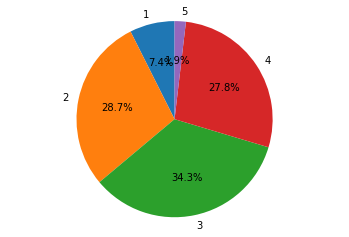

In [14]:
sizes = [0, 0, 0, 0, 0]
labels = [1, 2, 3, 4, 5]
for each in df.iloc[0:, 8]:
    sizes[each - 1] += 1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()

## Prep work Completion

In [15]:
df["Q1: Did you watch all of this week's videos (Sommerville, Scrum, etc)?"].describe()

count     108
unique      2
top       Yes
freq      103
Name: Q1: Did you watch all of this week's videos (Sommerville, Scrum, etc)?, dtype: object

In [16]:
summary = dict()
for each in df.iloc[0:, 1]:
    if each not in summary.keys():
        summary[each] = 1
    else:
        summary[each] += 1
print(summary)

{'Yes': 103, 'No': 5}


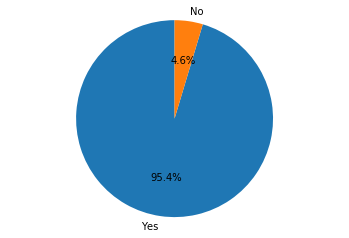

In [17]:
sizes = list(summary.values())
labels = list(summary.keys())
fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax2.axis('equal')
plt.show()

In [18]:
df["Q2: Did you read through the chapters provided (1. Software Products and 2. Agile SE)"].describe()

count     108
unique      2
top       Yes
freq      105
Name: Q2: Did you read through the chapters provided (1. Software Products and 2. Agile SE), dtype: object

In [19]:
summary2 = dict()
for each in df.iloc[0:, 2]:
    if each not in summary2.keys():
        summary2[each] = 1
    else:
        summary2[each] += 1
print(summary2)

{'Yes': 105, 'No': 3}


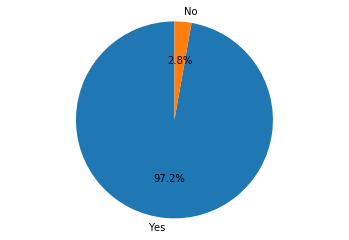

In [20]:
sizes2 = list(summary2.values())
labels2 = list(summary2.keys())
fig2_2, ax2_2 = plt.subplots()
ax2_2.pie(sizes2, labels=labels2, autopct='%1.1f%%', shadow=False, startangle=90)
ax2_2.axis('equal')
plt.show()

In [21]:
df["Q3: Did you feel prepared for this week's class activities?"].describe()

count     108
unique      2
top       Yes
freq       94
Name: Q3: Did you feel prepared for this week's class activities?, dtype: object

In [23]:
summary3 = dict()
for each in df.iloc[0:, 3]:
    if each not in summary3.keys():
        summary3[each] = 1
    else:
        summary3[each] += 1
print(summary3)

{'Yes': 94, 'No': 14}


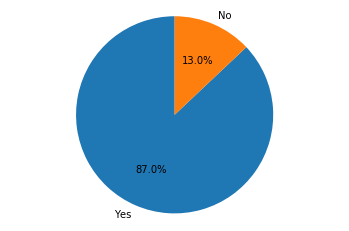

In [24]:
sizes3 = list(summary3.values())
labels3 = list(summary3.keys())
fig2_3, ax2_3 = plt.subplots()
ax2_3.pie(sizes3, labels=labels3, autopct='%1.1f%%', shadow=False, startangle=90)
ax2_3.axis('equal')
plt.show()

## Student Challenges Analysis

In [25]:
#Using noun extraction:
nouns = dict()
for student in df.iloc[0:, 5]:
    if student is np.nan:
        continue
    blob = TextBlob(student)
    for noun in blob.noun_phrases:
        if noun not in nouns.keys():
            nouns[noun] = 1
        else:
            nouns[noun] += 1
print(nouns)

{'forgetting': 1, 'requirements analysis activity': 1, 'requirement analysis activity': 6, 'bad headache': 1, 'dorodchi': 1, 'user stories': 5, 'review questions': 1, 'time management': 17, "week 's": 1, 'context diagram': 5, 'user story': 3, 'requirements context diagram': 1, 'past week': 5, 'overwhelming.â â': 1, 'motivation': 4, 'video game industry': 1, 'trying': 3, 'certain answers': 1, 'agile': 2, 'big thing': 1, 'full-time work': 1, 'requirement analysis activity.â': 2, 'complete assignments': 2, 'different website': 1, 'vital information': 1, 'lecture videos.â': 1, 'id': 1, 'specifically': 1, 'online store': 1, 'user stories assignment': 1, 'well': 1, 'main problem': 1, 'good pace': 1, 'meeting': 1, 'assignment deadlines': 1, 'time management / studying.â': 1, 'answers to.â': 1, 'context diagrams work': 1, 'work ethic': 1, 'watched': 1, 'godzilla': 1, 'fair trade': 1, 'module': 3, 'february': 1, 'but': 1, "ca n't figure": 1, 'grades': 1, 'assignments': 1, 'modules': 1, 'aside':

In [26]:
print('Common challenges:') #possible improvements: make the threshold variable using mean # of instances (may not scale well)
for noun in nouns:
    if nouns[noun] > 2:
        print(noun + ': ' + str(nouns[noun]) + " instances")

Common challenges:
requirement analysis activity: 6 instances
user stories: 5 instances
time management: 17 instances
context diagram: 5 instances
user story: 3 instances
past week: 5 instances
motivation: 4 instances
trying: 3 instances
module: 3 instances


## Student Solutions Analysis

In [28]:
#Attempt same noun extraction as before
nouns2 = dict()
for student in df.iloc[0:, 6]:
    if student is np.nan:
        continue
    blob2 = TextBlob(student)
    for noun in blob2.noun_phrases:
        if noun not in nouns2.keys():
            nouns2[noun] = 1
        else:
            nouns2[noun] += 1
print(nouns2)

{'ta': 5, 'review questions': 1, 'be': 2, "due dates wo n't sneak": 1, 'clear plan': 1, 'righting': 1, "to-do 's": 1, 'time wisely.â': 1, 'simple': 1, 'read': 3, 'group projects in.â': 1, 'difficult assignment': 1, 'class more.â': 1, 'zoom': 3, 'office hours': 3, 'big picture': 1, 'lecture videos.â': 1, 'user stories': 3, 'tas': 2, 'context diagram': 2, 'try': 1, 'huge help': 1, 'big lead': 1, 'above challenge': 1, 'class schedule': 1, 'proper': 1, 'school work': 1, 'hardest part': 1, 'canvas': 2, 'sure t review': 1, 'online resources': 2, 'class page': 1, 'context diagrams': 1, 'additionally': 1, "n't view": 1, 'previous recordings': 1, 'particular challenge': 1, 'stop': 1, 'godzilla': 1, 'solid': 1, 'continue': 1, 'cursory knowledge': 1, 'busiest days': 1, 'complete assignments': 2, 'online store': 1, 'should': 1, 'find': 1, 'final product': 1, 'class material': 1, 'necessary module parts': 1, 'own review': 1, 'member thats': 1, "n't interrogate": 1, 'bring': 1, 'extra layers': 1, 'q

In [29]:
print('Common solutions:')
for noun in nouns2:
    if nouns2[noun] > 2:
        print(noun + ': ' + str(nouns2[noun]) + " instances")

Common solutions:
ta: 5 instances
read: 3 instances
zoom: 3 instances
office hours: 3 instances
user stories: 3 instances


## Sentiment analysis

Sentiment ranges from -1 to 1, where -1 is most negative and 1 is most positive. Scores taken from the average of sentiments from both free response questions.

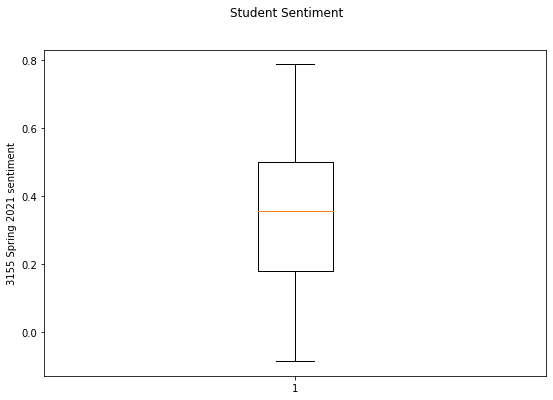

In [30]:
sid = SentimentIntensityAnalyzer()
sentiment = []
for response1, response2, response3, response4 in zip(df.iloc[0:, 4], df.iloc[0:, 5], df.iloc[0:, 6], df.iloc[0:, 7]):
    if response1 is np.nan or response2 is np.nan or response3 is np.nan or response4 is np.nan:
        continue
    else:
        sent1 = sid.polarity_scores(response1)
        sent2 = sid.polarity_scores(response2)
        sent3 = sid.polarity_scores(response3)
        sent4 = sid.polarity_scores(response4)
        sentAve = (sent1["compound"]+sent2["compound"]+sent3["compound"]+sent4["compound"])/4
        sentiment.append(sentAve)
fig1 = plt.figure(1, figsize = (9, 6))
ax1 = fig1.add_subplot(111)
ax1.set_ylabel('3155 Spring 2021 sentiment')
fig1.suptitle('Student Sentiment')
boxplot1 = ax1.boxplot(sentiment)

In [31]:
df2 = pd.DataFrame(sentiment)
df2.describe()

,0
count,106.000000
mean,0.348978
std,0.207115
min,-0.084200
25%,0.180606
50%,0.357275
75%,0.501500
max,0.786875


## WordClouds:

### Student Challenges

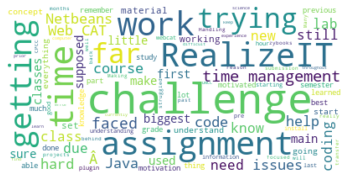

In [17]:
words = ""
for challenge in df.iloc[0:, 4]:
    if challenge is np.nan:
        continue
    words += (challenge + " ")
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("StudentChallengesWordCloud.png")

### Student Solutions

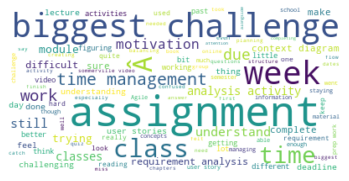

In [32]:
words = ""
for soln in df.iloc[0:, 5]:
    if soln is np.nan:
        continue
    words += (soln + " ")
wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words)
plt.figure()
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud2.to_file("StudentSolutionsWordCloud.png")

## N-gram analysis:

### Student Challenges:

In [33]:
blobString = ""
for challenge in df.iloc[0:, 5]:
    if challenge is np.nan:
        continue
    blobString += challenge + " "
blob = TextBlob(blobString)
for nval in range(1, 4):
    print("Most common " + str(nval) + "-grams:")
    gramdict = dict()
    for ngram in blob.ngrams(n=nval):
        ngramString = ""
        for each in ngram:
            ngramString += each + " "
        if ngramString not in gramdict.keys():
            gramdict[ngramString] = 1
        else:
            gramdict[ngramString] += 1
    for string in gramdict:
        if gramdict[string] > 5:
            print(string + ': ' + str(gramdict[string]) + " instances")
    print()

Most common 1-grams:
to : 99 instances
in : 35 instances
the : 136 instances
analysis : 8 instances
activity : 8 instances
and : 72 instances
assignment : 10 instances
I : 109 instances
had : 11 instances
a : 44 instances
bit : 6 instances
of : 50 instances
time : 27 instances
class : 19 instances
very : 9 instances
that : 20 instances
it : 31 instances
difficult : 9 instances
do : 19 instances
my : 39 instances
work : 19 instances
when : 7 instances
what : 22 instances
user : 9 instances
stories : 6 instances
or : 7 instances
were : 8 instances
My : 25 instances
biggest : 44 instances
challenge : 46 instances
this : 41 instances
week : 39 instances
was : 74 instances
understanding : 7 instances
how : 14 instances
like : 10 instances
would : 7 instances
other : 7 instances
up : 14 instances
me : 17 instances
with : 24 instances
Time : 9 instances
management : 19 instances
because : 13 instances
have : 28 instances
make : 8 instances
for : 29 instances
sure : 8 instances
think : 6 insta

### Student Solutions:

In [34]:
blobString = ""
for soln in df.iloc[0:, 6]:
    if soln is np.nan:
        continue
    blobString += soln + " "
blob = TextBlob(blobString)
for nval in range(1, 4):
    print("Most common " + str(nval) + "-grams:")
    gramdict = dict()
    for ngram in blob.ngrams(n=nval):
        ngramString = ""
        for each in ngram:
            ngramString += each + " "
        if ngramString not in gramdict.keys():
            gramdict[ngramString] = 1
        else:
            gramdict[ngramString] += 1
    for string in gramdict:
        if gramdict[string] > 5:
            print(string + ': ' + str(gramdict[string]) + " instances")
    print()

Most common 1-grams:
I : 140 instances
have : 21 instances
the : 99 instances
assignment : 7 instances
and : 70 instances
it : 21 instances
up : 8 instances
to : 117 instances
get : 12 instances
a : 37 instances
class : 19 instances
in : 30 instances
time : 36 instances
could : 9 instances
or : 8 instances
for : 30 instances
this : 22 instances
challenge : 20 instances
questions : 9 instances
them : 9 instances
would : 13 instances
help : 7 instances
all : 13 instances
of : 34 instances
my : 41 instances
with : 14 instances
more : 29 instances
schedule : 7 instances
sure : 10 instances
think : 6 instances
way : 6 instances
address : 11 instances
is : 9 instances
make : 10 instances
that : 13 instances
assignments : 14 instances
are : 8 instances
so : 13 instances
when : 6 instances
they : 8 instances
due : 7 instances
start : 6 instances
working : 8 instances
on : 31 instances
do : 12 instances
n't : 8 instances
out : 10 instances
at : 8 instances
week : 11 instances
me : 10 instances


## NGrams with NLTK

In [4]:
from nltk.util import ngrams
import nltk

In [5]:
def _gram(corpus, num):
    grams = ngrams(corpus, num)
    grampairs = dict()
    
    for token in list(grams):
        if token not in grampairs.keys():
            grampairs[token] = 1
        else:
            grampairs[token] += 1
    lst = sorted(grampairs.items(), key=lambda x: x[1], reverse=True)
    return lst

## Challenges

In [6]:
chal_string = ""
for challenge in df.iloc[0:, 5]:
    if challenge is np.nan:
        continue
    for word in challenge.split():
        if word.isalpha():
            chal_string += word.lower() + " "


tokenize = nltk.word_tokenize(chal_string)


uni = _gram(tokenize, 1)
bi = _gram(tokenize, 2)
tri = _gram(tokenize, 3)

df_grams = pd.DataFrame(list(zip(uni, bi, tri)), columns = ['unigrams/count', 'bigrams/count', 'trigrams/count'])
df_grams

#Remove comment to download csv file
df_grams.to_csv('ngrams_chal.csv')

## Solutions

In [7]:
chal_string = ""
for challenge in df.iloc[0:, 6]:
    if challenge is np.nan:
        continue
    for word in challenge.split():
        if word.isalpha():
            chal_string += word.lower() + " "


tokenize = nltk.word_tokenize(chal_string)


uni = _gram(tokenize, 1)
bi = _gram(tokenize, 2)
tri = _gram(tokenize, 3)

df_grams = pd.DataFrame(list(zip(uni, bi, tri)), columns = ['unigrams/count', 'bigrams/count', 'trigrams/count'])
df_grams

#Remove comment to download csv file
df_grams.to_csv('ngrams_sol.csv')

## Important topics learned

In [8]:
chal_string = ""
for challenge in df.iloc[0:, 4]:
    if challenge is np.nan:
        continue
    for word in challenge.split():
        if word.isalpha():
            chal_string += word.lower() + " "


tokenize = nltk.word_tokenize(chal_string)


uni = _gram(tokenize, 1)
bi = _gram(tokenize, 2)
tri = _gram(tokenize, 3)

df_grams = pd.DataFrame(list(zip(uni, bi, tri)), columns = ['unigrams/count', 'bigrams/count', 'trigrams/count'])
df_grams

#Remove comment to download csv file
df_grams.to_csv('ngrams_learn.csv')